In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1 = pd.read_csv('Delhi_anomaly2_1979_2019.csv')
# this is the anomalies time series without using the window

In [3]:
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns

In [7]:
df1 = df1.set_index('Unnamed: 0')

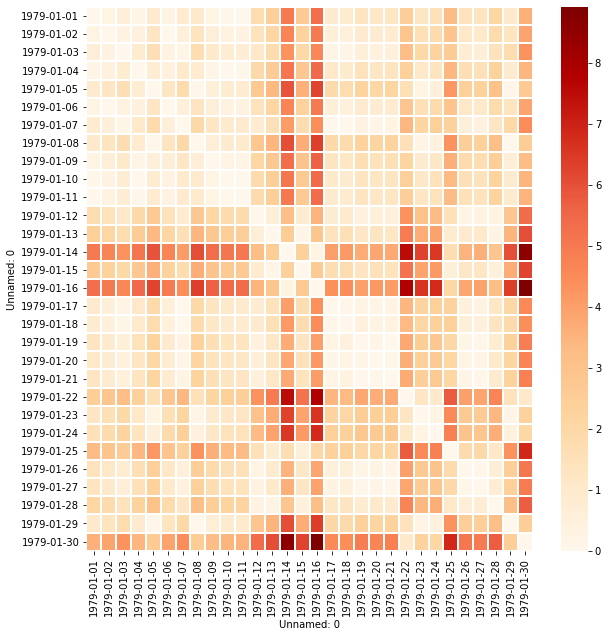

In [8]:
dist = pd.DataFrame(distance_matrix(df1[0:30].values, df1[0:30].values), index=df1[0:30].index, columns=df1[0:30].index)
plt.figure(figsize=(10,10))
sns.heatmap(
    dist,
    cmap='OrRd',linewidth=1)

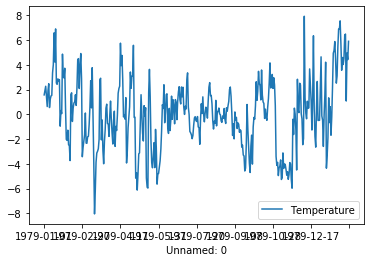

In [9]:
df1[0:400].plot()

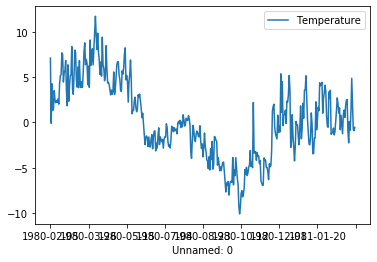

In [10]:
df1[400:800].plot()

In [11]:
len(df1)

14975

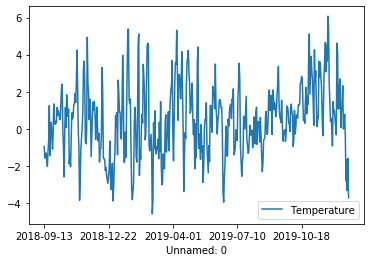

In [13]:
df1[14500:14974].plot()

In [14]:
X = np.array(df1['Temperature'])
absX = X - np.min(X)

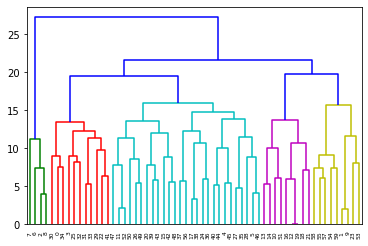

In [15]:
dendrogram = sch.dendrogram(sch.linkage(absX[0:1770],method='ward'))

In [16]:
Dt = np.zeros(29756).reshape(14878, 2)
for i in range(14878):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

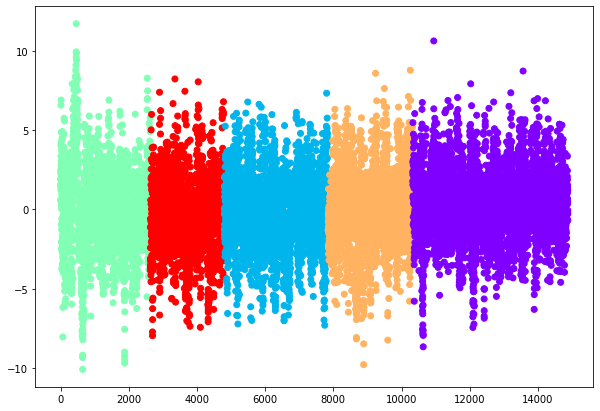

In [17]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

Now, from the average_window anomaly dataset


In [18]:
df2 = pd.read_csv('Delhi_anomaly2_usingWindow_1979_2019.csv')

In [20]:
df2  = df2.set_index('Unnamed: 0')

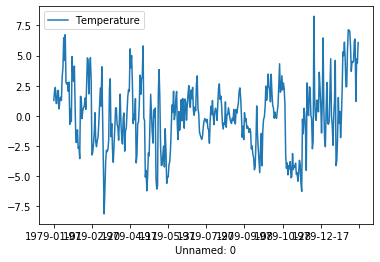

In [21]:
df2[0:400].plot()

In [22]:
X = np.array(df2['Temperature'])
absX = X - np.min(X)

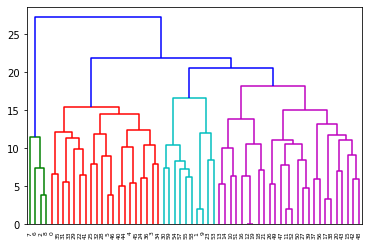

In [23]:
dendrogram = sch.dendrogram(sch.linkage(absX[0:1770],method='ward'))

In [24]:
Dt = np.zeros(29756).reshape(14878, 2)
for i in range(14878):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

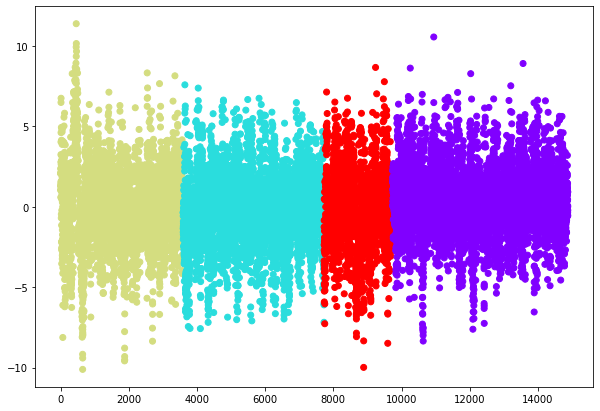

In [25]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')